In [1]:
import pandas as pd
import matplotlib as plot
import numpy as np
import scipy as sp
import sys
import IPython
import sklearn
import mglearn

In [2]:
df = pd.read_csv('cleanTTAB.csv', encoding= 'unicode_escape') #this is the basic dataset

In [3]:
print(df.dtypes)

Confusion          int64
Design             int64
PType              int64
Ratio            float64
Distinctive        int64
Sum                int64
Goods              int64
DisclaimerCOP      int64
DisclaimerAR       int64
dtype: object


In [4]:
df.shape

(322, 9)

In [5]:
print(df.columns)

Index(['Confusion', 'Design', 'PType', 'Ratio', 'Distinctive', 'Sum', 'Goods',
       'DisclaimerCOP', 'DisclaimerAR'],
      dtype='object')


In [6]:
df.describe()

,Confusion,Design,PType,Ratio,Distinctive,Sum,Goods,DisclaimerCOP,DisclaimerAR
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,0.779503,0.093168,1.409938,0.645311,3.121118,6.378882,2.391304,0.257764,0.360248
std,0.415227,0.291120,0.636110,0.257732,1.136037,1.538475,0.707538,0.438084,0.480820
min,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.442500,2.000000,6.000000,2.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.630000,3.000000,6.000000,3.000000,0.000000,0.000000
75%,1.000000,0.000000,2.000000,0.890000,4.000000,7.000000,3.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,6.000000,9.000000,3.000000,1.000000,1.000000


In [7]:
dfnc = df.loc[df['Confusion'] == 0]

In [8]:
dfnc.describe()

,Confusion,Design,PType,Ratio,Distinctive,Sum,Goods,DisclaimerCOP,DisclaimerAR
count,71.0,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,0.0,0.154930,1.746479,0.595070,3.140845,5.690141,2.295775,0.197183,0.422535
std,0.0,0.364413,0.731306,0.268386,1.323370,1.736923,0.781836,0.400704,0.497479
min,0.0,0.000000,1.000000,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,0.385000,2.000000,4.500000,2.000000,0.000000,0.000000
50%,0.0,0.000000,2.000000,0.590000,3.000000,6.000000,2.000000,0.000000,0.000000
75%,0.0,0.000000,2.000000,0.845000,4.000000,6.000000,3.000000,0.000000,1.000000
max,0.0,1.000000,3.000000,1.000000,6.000000,9.000000,3.000000,1.000000,1.000000


In [9]:
dfc = df.loc[df['Confusion'] == 1]

In [10]:
dfc.describe()

,Confusion,Design,PType,Ratio,Distinctive,Sum,Goods,DisclaimerCOP,DisclaimerAR
count,251.0,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,1.0,0.075697,1.314741,0.659522,3.115538,6.573705,2.418327,0.274900,0.342629
std,0.0,0.265042,0.573186,0.253381,1.080091,1.421811,0.684327,0.447356,0.475537
min,1.0,0.000000,1.000000,0.070000,1.000000,3.000000,1.000000,0.000000,0.000000
25%,1.0,0.000000,1.000000,0.475000,2.000000,6.000000,2.000000,0.000000,0.000000
50%,1.0,0.000000,1.000000,0.650000,3.000000,6.000000,3.000000,0.000000,0.000000
75%,1.0,0.000000,2.000000,0.900000,4.000000,7.000000,3.000000,1.000000,1.000000
max,1.0,1.000000,3.000000,1.000000,6.000000,9.000000,3.000000,1.000000,1.000000


In [11]:
df.corr()

,Confusion,Design,PType,Ratio,Distinctive,Sum,Goods,DisclaimerCOP,DisclaimerAR
Confusion,1.000000,-0.113010,-0.281821,0.103837,-0.009250,0.238470,0.071921,0.073662,-0.069005
Design,-0.113010,1.000000,0.028630,-0.212968,-0.109583,-0.134705,0.034194,0.079804,0.182331
PType,-0.281821,0.028630,1.000000,0.052426,0.099205,-0.038239,0.030094,-0.078531,0.075853
Ratio,0.103837,-0.212968,0.052426,1.000000,0.056528,0.663745,-0.133920,-0.306283,-0.417205
Distinctive,-0.009250,-0.109583,0.099205,0.056528,1.000000,0.007528,-0.028141,-0.119262,-0.137161
Sum,0.238470,-0.134705,-0.038239,0.663745,0.007528,1.000000,-0.219620,-0.186954,-0.252472
Goods,0.071921,0.034194,0.030094,-0.133920,-0.028141,-0.219620,1.000000,0.125850,-0.021898
DisclaimerCOP,0.073662,0.079804,-0.078531,-0.306283,-0.119262,-0.186954,0.125850,1.000000,0.267682
DisclaimerAR,-0.069005,0.182331,0.075853,-0.417205,-0.137161,-0.252472,-0.021898,0.267682,1.000000


In [14]:
df2 = pd.read_csv('even.csv', encoding= 'unicode_escape') #This removes confusion findings to balance the dataset.

In [15]:
df2.shape #see number decrease.

(143, 9)

In [16]:
labels = df2['Confusion']
data = df2[['Design', 'PType', 'SSM_Sum', 'Ratio']] #These are the features that performed the best after much trial/error

In [17]:
from sklearn.preprocessing import scale
scaled_data = scale(data, axis = 0)
print(scaled_data[0])

[-0.30265996  0.71125578 -1.91856689 -0.77163665]


In [18]:
from sklearn.model_selection import train_test_split
training_data, validation_data, training_labels, validation_labels = train_test_split(scaled_data, labels, train_size = 0.8, test_size = 0.2, random_state = 1)

In [19]:
print('Train_Shape:', training_data.shape)
print('Validation_Shape',validation_data.shape)

Train_Shape: (114, 4)
Validation_Shape (29, 4)


In [20]:
dataframe = pd.DataFrame(training_data, columns=data.columns)

In [21]:
dataframe.head(10)

,Design,PType,SSM_Sum,Ratio
0,-0.30266,-0.741738,-0.068982,0.281408
1,-0.30266,2.164250,-0.068982,1.033583
2,-0.30266,-0.741738,-0.685510,-0.245114
3,-0.30266,-0.741738,-0.068982,-0.395549
4,-0.30266,-0.741738,-0.685510,-0.057071
5,-0.30266,-0.741738,-0.068982,-0.884463
6,-0.30266,0.711256,-0.068982,-1.410985
7,-0.30266,2.164250,-0.068982,0.469452
8,-0.30266,-0.741738,-0.068982,-0.019462
9,-0.30266,-0.741738,-0.068982,-0.019462


array([[<AxesSubplot:xlabel='Design', ylabel='Design'>,
        <AxesSubplot:xlabel='PType', ylabel='Design'>,
        <AxesSubplot:xlabel='SSM_Sum', ylabel='Design'>,
        <AxesSubplot:xlabel='Ratio', ylabel='Design'>],
       [<AxesSubplot:xlabel='Design', ylabel='PType'>,
        <AxesSubplot:xlabel='PType', ylabel='PType'>,
        <AxesSubplot:xlabel='SSM_Sum', ylabel='PType'>,
        <AxesSubplot:xlabel='Ratio', ylabel='PType'>],
       [<AxesSubplot:xlabel='Design', ylabel='SSM_Sum'>,
        <AxesSubplot:xlabel='PType', ylabel='SSM_Sum'>,
        <AxesSubplot:xlabel='SSM_Sum', ylabel='SSM_Sum'>,
        <AxesSubplot:xlabel='Ratio', ylabel='SSM_Sum'>],
       [<AxesSubplot:xlabel='Design', ylabel='Ratio'>,
        <AxesSubplot:xlabel='PType', ylabel='Ratio'>,
        <AxesSubplot:xlabel='SSM_Sum', ylabel='Ratio'>,
        <AxesSubplot:xlabel='Ratio', ylabel='Ratio'>]], dtype=object)

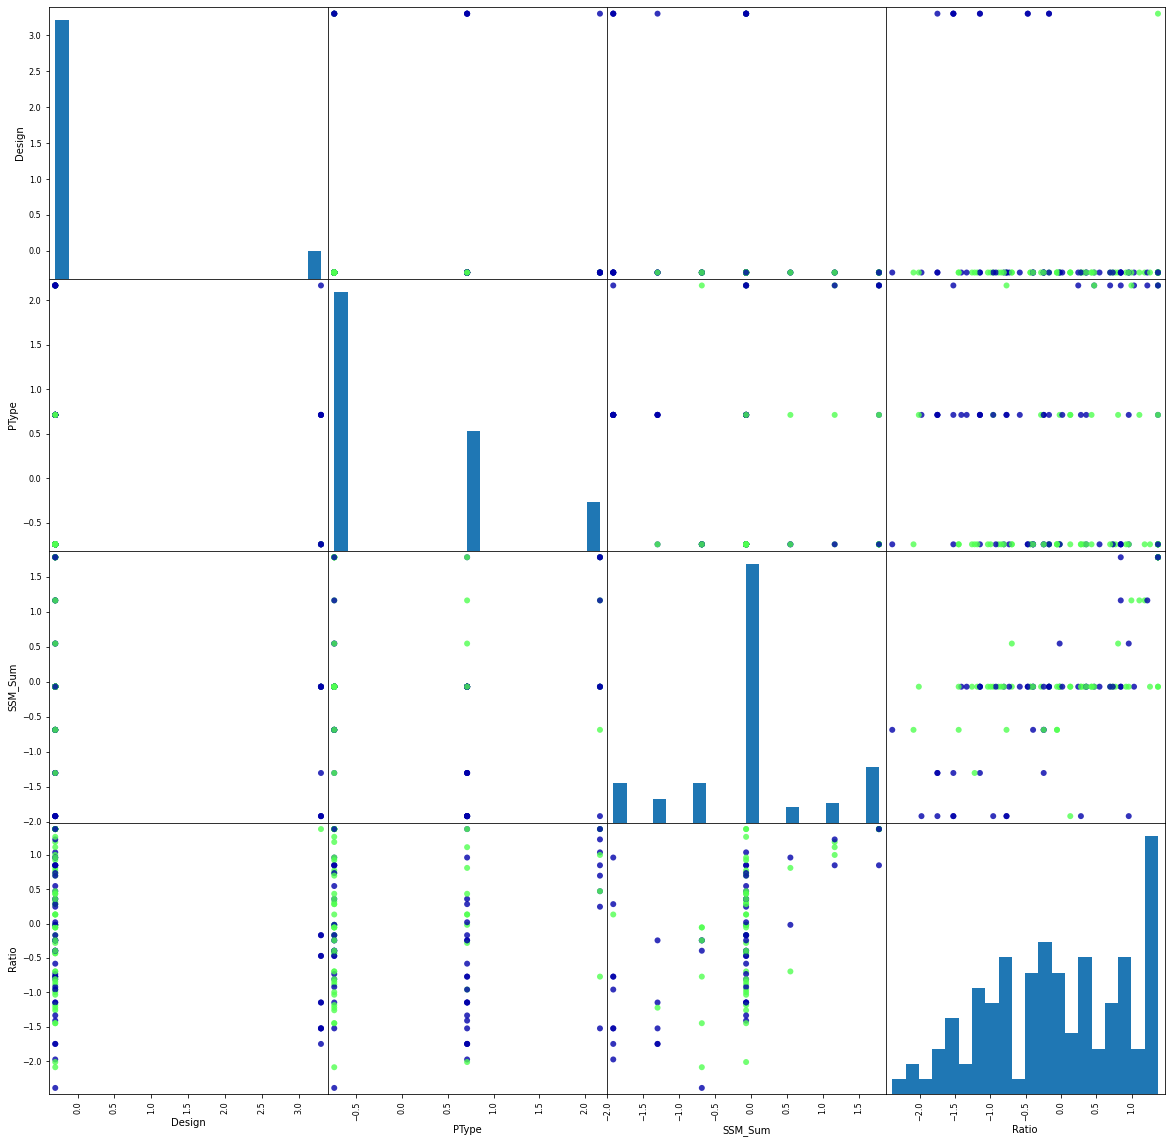

In [22]:
pd.plotting.scatter_matrix(dataframe, c=training_labels, figsize=(20, 20), marker='o', hist_kwds={'bins':20}, alpha=.8, cmap=mglearn.cm3)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(training_data, training_labels)
print(classifier.score(validation_data, validation_labels))
#5 neighbors seems to be the sweet spot

0.8275862068965517


In [35]:
#randomforest with dataset that increased the number of non-confusing examples to balance the set
even = pd.read_csv('NewTTAB.csv', encoding= 'unicode_escape')
labels = even['Confusion']
data = even[['Design', 'PType', 'SSM_Sum', 'Ratio']]
scaled_data = scale(data, axis = 0)
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(scaled_data, labels, train_size = 0.8, test_size = 0.2, random_state = 1)
forest = RandomForestClassifier(random_state = 1)
forest.fit(X_train, y_train)
y_pred_test = forest.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.8064516129032258

In [36]:
confusion_matrix(y_test, y_pred_test)

array([[36,  8],
       [10, 39]], dtype=int64)

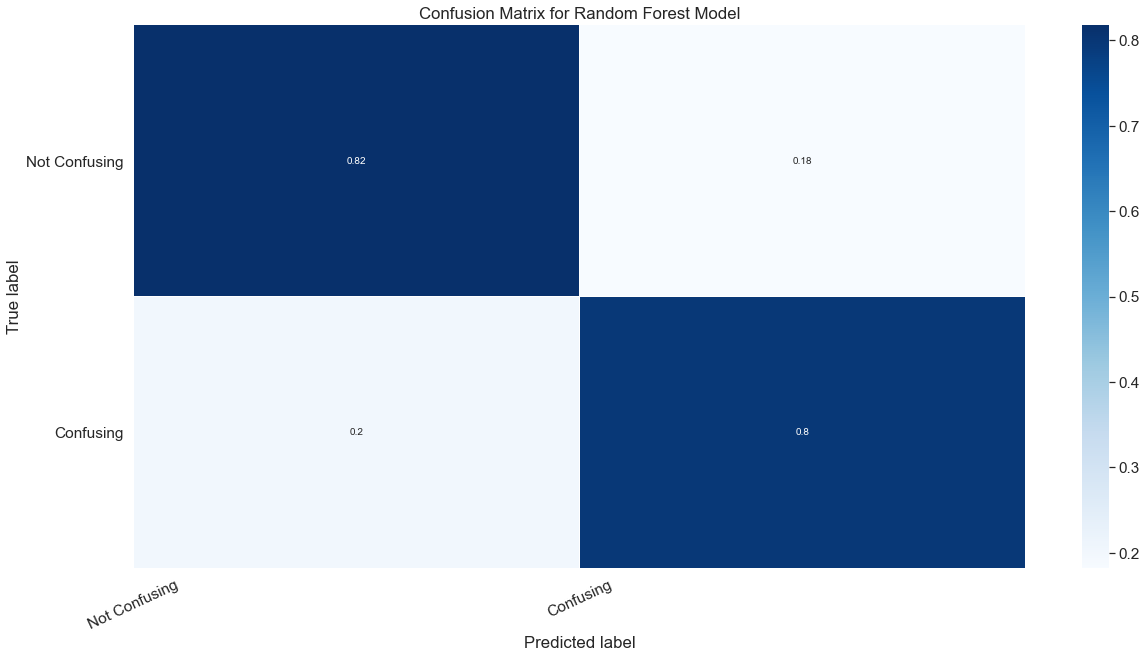

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
class_names = ['Not Confusing','Confusing']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [38]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        44
           1       0.83      0.80      0.81        49

    accuracy                           0.81        93
   macro avg       0.81      0.81      0.81        93
weighted avg       0.81      0.81      0.81        93

